# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Chandler Nixon
**Date:** 14 September 2025 
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [9]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
getwd()

[1] "/workspaces/assignment-1-chandlerln87/assignment/Homework"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [10]:
# Import the messy sales dataset
messy_sales <- read_csv("/workspaces/assignment-1-chandlerln87/data/messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
paste("Column names:", paste(names(messy_sales), collapse = ", "))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"


[1] "Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity"

#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [11]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


In [12]:
# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

[1] "=== DATA STRUCTURE ==="
spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** Sales_Amount and Purchase_Date both have missing values (22 and 14 respectively)

2. **Potential Outliers:** In sales_amount and quantity there are negative values which arent possible. Also, they both have some extremely high values

3. **Data Inconsistencies:** From the initial inspection, there are some capitlization inconsistencies in the naming of product categories.

4. **Data Types:** All columns seem to be using the correct data types, as double can store floating point values when needed.

5. **Invalid Values:** There are negative quantities and sales amounts in the data.

**YOUR OBSERVATIONS:**

The data requires thorough preprocessing. Product types need to be made consistent as well as outliers in sales_amount and quantity need to be checked. The negative values also need to be corrected as they are not valid entries.

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [14]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- sapply(messy_sales, function(x) sum(is.na(x)))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"


# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8            41 NA            ELECTRONICS              789. 2023-11-04   
 9            43 Bob Johnson   ELECTRONICS               NA  2023-12-28   
10            45 Jane Doe      electronics               NA  2023-01-08   
# ℹ 34 more rows
# ℹ 1 more variable: Quantity <dbl>


"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

In [17]:
# TODO: Remove all rows with missing values
sales_removed_na <- messy_sales[complete.cases(messy_sales), ]

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [18]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [19]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  ### YOUR CODE HERE
  unique_val <- unique(v)
  unique_val[which.max(tabulate(match(v, unique_val)))]
  ### Hint: Use unique(), tabulate(), match(), and which.max()
}

In [21]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <- ifelse(is.na(sales_imputed$Customer_Name), 
                                     get_mode(sales_imputed$Customer_Name[!is.na(sales_imputed$Customer_Name)]), 
                                     sales_imputed$Customer_Name)

In [26]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- ifelse(is.na(sales_imputed$Quantity), median(sales_imputed$Quantity, na.rm=TRUE), sales_imputed$Quantity)

In [27]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [ ]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [35]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [36]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [37]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**

While we did not impute anything to do with sales amount, I would recommend imputation as most columns still had valid information outside of the missing values. Imputing data keeps the already collected data there to be analyzed.

2. **What are the trade-offs between removal and imputation?**

Removal can lose data and cause statistical analysis to be less reliable, while imputation could lead to misrepresentation of the data even if the sample sizes are larger.

---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

In [55]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(sales_imputed$Sales_Amount, 0.25, na.rm=TRUE)
Q3_sales <- quantile(sales_imputed$Sales_Amount, 0.75, na.rm=TRUE)
IQR_sales <- Q3_sales - Q1_sales

In [56]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5*(IQR_sales)
lower_threshold <- Q1_sales - 1.5*(IQR_sales)

In [57]:
### TODO: Identify outliers
outliers <- sales_imputed %>% filter(Sales_Amount > upper_threshold | Sales_Amount < lower_threshold)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"
# A tibble: 6 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 Jane Doe      Electronics              5000 2023-06-16   
2            46 John Smith    Books                    8000 NA           
3            96 John Smith    electronics             50000 2023-09-22   
4           146 John Smith    ELECTRONICS             12000 2023-01-22   
5           167 Bob Johnson   Electronics            100000 2023-09-18   
6           177 Jane Doe      ELECTRONICS             25000 2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


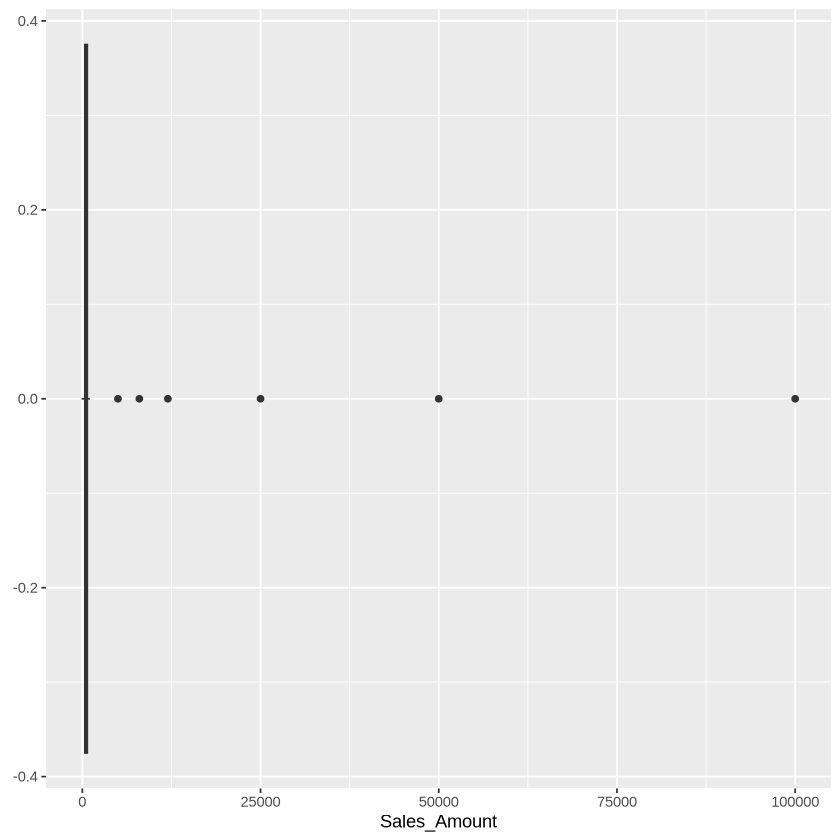

In [58]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(x=Sales_Amount)) + geom_boxplot()

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [59]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>% filter(!Sales_Amount >= upper_threshold | Sales_Amount <= lower_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


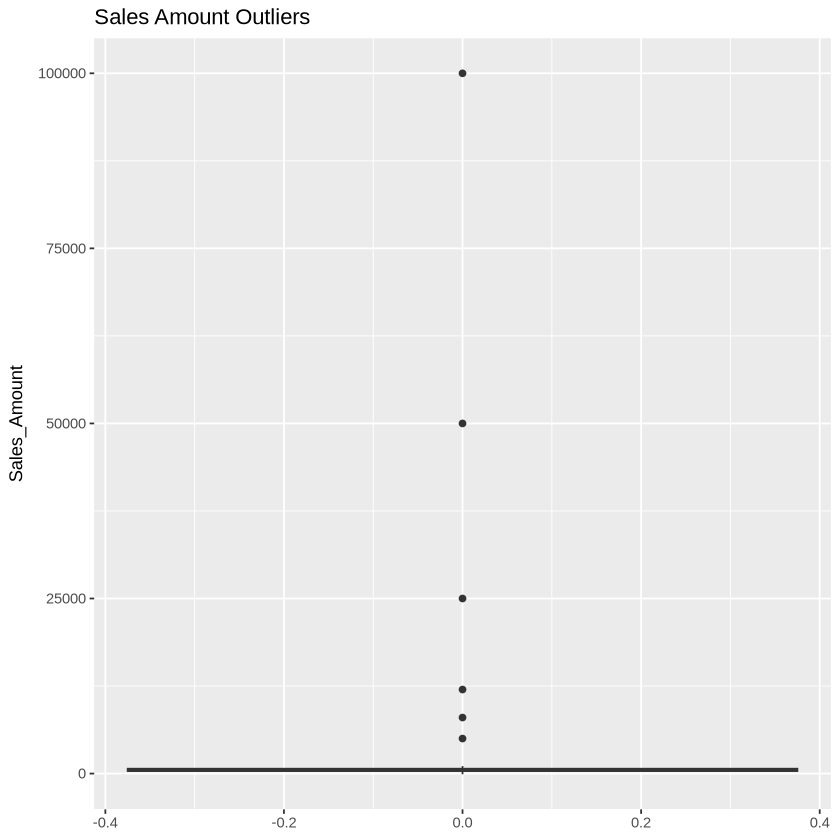

In [61]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")
# Hint: ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [ ]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>% filter(!Sales_Amount >= upper_threshold | Sales_Amount <= lower_threshold)
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

In [62]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed %>% mutate(capped_data = ifelse(Sales_Amount > upper_threshold, 
                                                              upper_threshold, 
                                                                ifelse(Sales_Amount < lower_threshold,
                                                                       lower_threshold,
                                                                       Sales_Amount)))

In [64]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(sales_outliers_capped$Sales_Amount > upper_threshold,
                                             upper_threshold,
                                             ifelse(sales_outliers_capped$Sales_Amount < lower_threshold,
                                                     lower_threshold,
                                                     sales_outliers_capped$Sales_Amount))
### Hint: Use ifelse() to replace values above/below thresholds

In [65]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -100.000 1192.331


In [66]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>% filter(Sales_Amount > upper_threshold | Sales_Amount < lower_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [67]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_capped

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 200   7


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -100.0   362.6   531.3   531.5   694.5  1192.3      22 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**

In my experience, preserving data where possible is paramount ESPECIALLY in a dataset this small. The sales_outliers_capped dataset preserves all rows leaving the dataset with the most original data possible. For the bad data, it imputes and caps outliers to try and limit skew from possibly misentered data. This will allow for insights to be gained on the majority of these sales while only losing insight into outlier transactions which we did not have enough data to make insight into anyways.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [70]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    nrow(messy_sales %>% filter(Sales_Amount > upper_threshold | Sales_Amount < lower_threshold))
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    nrow(final_dataset %>% filter(Sales_Amount > upper_threshold | Sales_Amount < lower_threshold))
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows        200.00     200.00
2      Missing Values         52.00      58.00
3   Mean Sales_Amount       1614.91     531.50
4 Median Sales_Amount        531.29     531.29
5            Outliers          6.00       0.00


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**

If there are rows which are missing the majority of their information and the size of the data is large enough, it would often be simpler to just remove the data. An example would be a dataset that includes demographic data from user sign ups of a website. If a user only input a username and no demographic data was present, that row has little value and imputation would have little value as well as it would purely be a fictitious person at that point. Removal is more practical and often faster.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

Often time, outliers need to be handled with a fine-toothed comb. Some of these outliers could just be big spenders who came for a bulk order while others could be typos made in an invoice. Removing outliers could lead to under representing sales but keeping false outliers could lead to over representation. Extreme outliers often need to be faced individually or in groups to ensure proper representation.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

These values might skew your insights away from the actual population parameters. Missing values could make your estimations less reliable and introduce more variability while outliers might pull a mean away from the value that truly matters.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

Changing data can lead to misrepresentations if done incorrectly. If one entire group of people has missing or bad data, removal could lead to them not being included in the insights. Keeping a proper log of what is being removed and the reasoning behind it, as well as keeping the original dataset intact somewhere can help ensure data integrity and transparency.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**